# Is a game successful or not ?

In this preliminary analysis i will spot potential patterns that will help to determine whether a game succeeds or not.
This in order to help identify the successful games so we can plan advertising campaigns to bring more customer and revenue.

I will be using user and expert reviews, genres, platforms, and historical data (2016 and before) on game sales that are available from open sources.

The advertising campaigns are planed for calendar year 2017. 

## Initialization

In [1]:
#pip install sidetable

In [2]:
import pandas as pd
import statistics
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
from scipy import stats
from scipy import stats as st
import os
from functools import reduce
#import sidetable
from statistics import mode
import matplotlib as mpl
from scipy.stats import levene
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Loading data

In [3]:
#os.getcwd()

In [4]:
#os.chdir(r'C:\Users\wolff\Desktop\Practicom_projects\P_4')

In [5]:
try:
    games_df = pd.read_csv(r'C:\Users\wolff\Desktop\Practicom_projects\P_5\games.csv')
except:
    games_df = pd.read_csv(r'/datasets/games.csv')

## Studing genral information 

In [6]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
games_df.shape

(16715, 11)

In [8]:
games_df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
games_df.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [10]:
games_df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [11]:
games_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [12]:
games_df.Year_of_Release.mode()

0    2008.0
dtype: float64

In [13]:
games_df.describe(include=['object'])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [14]:
games_df[games_df.User_Score=='tbd']['Year_of_Release'].value_counts(sort=False)

2014.0     21
2005.0    121
2012.0     24
2002.0    192
2004.0    107
2003.0     95
2001.0     82
2013.0     15
2015.0     38
2000.0     43
1999.0      8
2007.0    192
2009.0    405
2016.0     34
2008.0    326
2006.0    124
1997.0      1
2010.0    331
2011.0    217
Name: Year_of_Release, dtype: int64

In [15]:
mis_values = games_df.isnull().sum().to_frame('missing_values')
mis_values['%'] = (round(games_df.isnull().sum()/len(games_df),3))*100
mis_values.sort_values(by='missing_values',ascending=False).style.background_gradient('coolwarm',subset=["missing_values", "%"])

,missing_values,%
Critic_Score,8578,51.300000
Rating,6766,40.500000
User_Score,6701,40.100000
Year_of_Release,269,1.600000
Name,2,0.000000
Genre,2,0.000000
Platform,0,0.000000
NA_sales,0,0.000000
EU_sales,0,0.000000
JP_sales,0,0.000000


In [16]:
dup_values = games_df.duplicated().sum()
dup_values

0

<u>Intial overview of the data:</u>

* There are 16,715 rows of data with 11 columns.

1. Missing data:

 - User_Score -> 6,701 of missing values <font color='red'>Needs more in depth analysis my first diriction is to use groupby 
   and fill with median</font> 
 - Rating -> 6,766 of missing values <font color='red'>Needs more in depth analysis my first diriction is to use groupby 
   and fill with median</font>
 - Critic_Score -> 8,578 of missing values <font color='red'>Needs more in depth analysis my first diriction is to use groupby 
   and fill with median</font>
 - Year_of_Release -> 269 of missing values <font color='red'>At this point before going in depth analysis of the data, my 
   diraction of handling it will be replacing this missing values with mode</font>
 - Name and Genre -> both have 2 missing values <font color='red'>will be removed from the data as there is no why to know the
   name of the game or the genre that is missing</font> 
 
2. Datatype: 

 - User_Score -> is object <font color='red'>will change to float</font>
 
 
3. Other issues sppotted:

 - names of columns are have both lower and upper case <font color='red'>will use .str.lower method to change to lowere 
   case</font>
 - In the column user_score we have tbd <font color='red'> tbd is equivalent to Nan-s will replace tbd with nan</font>
 
*****

## Preparing the data

In [17]:
games_df.columns= games_df.columns.str.lower()
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [18]:
games_df['name'].isna().sum()

2

In [19]:
games_df.query('name.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [20]:
games_df = games_df.dropna(subset=['name'])

In [21]:
games_df['name'].isna().sum()

0

Removed Nan-s in name and genre
****

In [22]:
len(games_df.query('user_score == "tbd"'))

2424

In [23]:
games_df.user_score.replace('tbd',np.NaN,inplace=True)

In [24]:
len(games_df.query('user_score == "tbd"'))

0

In [25]:
mis_values = games_df.isnull().sum().to_frame('missing_values')
mis_values['%'] = (round(games_df.isnull().sum()/len(games_df),3))*100
mis_values.sort_values(by='missing_values',ascending=False).style.background_gradient('coolwarm',subset=["missing_values", "%"])

,missing_values,%
user_score,9123,54.600000
critic_score,8576,51.300000
rating,6764,40.500000
year_of_release,269,1.600000
name,0,0.000000
platform,0,0.000000
genre,0,0.000000
na_sales,0,0.000000
eu_sales,0,0.000000
jp_sales,0,0.000000


Replaced 'tbd' in 'user_score' with Nan-s
****

In [26]:
games_df['user_score'].isna().sum()

9123

In [27]:
games_df['user_score'] = games_df['user_score'].astype('float64')

Nan-s are left W/O filling.

Possible resons for nan-s could be no user score at the time the data was retrived in addition to the nan-s we added by replacing 'tbd' with nan-s.
****

In [28]:
games_df['year_of_release'] = games_df['year_of_release'].astype('float64')

In [29]:
games_df['year_of_release'].isna().sum()

269

In [30]:
games_df = games_df.dropna(subset=['year_of_release'])

In [31]:
games_df['year_of_release'].isna().sum()

0

As the year_of_release is 1.6% of the overall i droped the missing values 

Possible resons for nan-s could be that the game was not yet released at the time  

****

In [32]:
games_df[games_df.name=='Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [33]:
games_df['critic_score'].isna().sum()

8461

Nan-s are left W/O filling.

Possible resons for nan-s could be that critics havent reviewed it at the time data was retrived and the data was not updated 
once the y did review it 

****

In [34]:
games_df.describe(include=['object'])

,name,platform,genre,rating
count,16444,16444,16444,9768
unique,11426,31,12,8
top,Need for Speed: Most Wanted,PS2,Action,E
freq,12,2127,3307,3921


In [35]:
games_df['rating'].isna().sum()

6676

In [36]:
games_df['rating'] = games_df['rating'].fillna(games_df.groupby('name')['rating'].transform(mode))             

In [37]:
games_df['rating'].isna().sum()

6409

In [38]:
games_df.rating.replace(np.NaN,'unknown',inplace=True) 

In [39]:
len(games_df.query('rating == "unknown"'))

6409

Filled nan-s with most frequent rating, did by name of the game.
There is still nan-s that i replaced with 'unknown' for future analsis. 

Possible resons for nan-s could be that the ESRB did not assign age rating yet to the game at the time data was retrived

****

In [40]:
games_df[games_df.name=='Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,T
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,T
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,T
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [41]:
mis_values = games_df.isnull().sum().to_frame('missing_values')
mis_values['%'] = (round(games_df.isnull().sum()/len(games_df),3))*100
mis_values.sort_values(by='missing_values',ascending=False).style.background_gradient('coolwarm',subset=["missing_values", "%"])

,missing_values,%
user_score,8981,54.600000
critic_score,8461,51.500000
name,0,0.000000
platform,0,0.000000
year_of_release,0,0.000000
genre,0,0.000000
na_sales,0,0.000000
eu_sales,0,0.000000
jp_sales,0,0.000000
other_sales,0,0.000000


In [42]:
games_df['total_sales'] = games_df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [43]:
games_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


## Analyzing the data
#### How many games were released in different years?
#### Is the data for every period significant?

In [44]:
games_df_year = games_df[['name','year_of_release']].groupby('year_of_release')['name'].count().reset_index()
games_df_year
games_df_year.name.median()

,year_of_release,name
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


338.0

Text(0.5, 1.0, 'Released Games by year')

Text(0, 0.5, 'Number of games')

[Text(1980.0, 0, '1980.0'),
 Text(1981.0, 0, '1981.0'),
 Text(1982.0, 0, '1982.0'),
 Text(1983.0, 0, '1983.0'),
 Text(1984.0, 0, '1984.0'),
 Text(1985.0, 0, '1985.0'),
 Text(1986.0, 0, '1986.0'),
 Text(1987.0, 0, '1987.0'),
 Text(1988.0, 0, '1988.0'),
 Text(1989.0, 0, '1989.0'),
 Text(1990.0, 0, '1990.0'),
 Text(1991.0, 0, '1991.0'),
 Text(1992.0, 0, '1992.0'),
 Text(1993.0, 0, '1993.0'),
 Text(1994.0, 0, '1994.0'),
 Text(1995.0, 0, '1995.0'),
 Text(1996.0, 0, '1996.0'),
 Text(1997.0, 0, '1997.0'),
 Text(1998.0, 0, '1998.0'),
 Text(1999.0, 0, '1999.0'),
 Text(2000.0, 0, '2000.0'),
 Text(2001.0, 0, '2001.0'),
 Text(2002.0, 0, '2002.0'),
 Text(2003.0, 0, '2003.0'),
 Text(2004.0, 0, '2004.0'),
 Text(2005.0, 0, '2005.0'),
 Text(2006.0, 0, '2006.0'),
 Text(2007.0, 0, '2007.0'),
 Text(2008.0, 0, '2008.0'),
 Text(2009.0, 0, '2009.0'),
 Text(2010.0, 0, '2010.0'),
 Text(2011.0, 0, '2011.0'),
 Text(2012.0, 0, '2012.0'),
 Text(2013.0, 0, '2013.0'),
 Text(2014.0, 0, '2014.0'),
 Text(2015.0, 0, '20

Text(1980.0, 44, '9')

Text(1981.0, 81, '46')

Text(1982.0, 71, '36')

Text(1983.0, 52, '17')

Text(1984.0, 49, '14')

Text(1985.0, 49, '14')

Text(1986.0, 56, '21')

Text(1987.0, 51, '16')

Text(1988.0, 50, '15')

Text(1989.0, 52, '17')

Text(1990.0, 51, '16')

Text(1991.0, 76, '41')

Text(1992.0, 78, '43')

Text(1993.0, 95, '60')

Text(1994.0, 156, '121')

Text(1995.0, 254, '219')

Text(1996.0, 298, '263')

Text(1997.0, 324, '289')

Text(1998.0, 414, '379')

Text(1999.0, 373, '338')

Text(2000.0, 385, '350')

Text(2001.0, 517, '482')

Text(2002.0, 864, '829')

Text(2003.0, 810, '775')

Text(2004.0, 797, '762')

Text(2005.0, 974, '939')

Text(2006.0, 1041, '1006')

Text(2007.0, 1232, '1197')

Text(2008.0, 1462, '1427')

Text(2009.0, 1461, '1426')

Text(2010.0, 1290, '1255')

Text(2011.0, 1171, '1136')

Text(2012.0, 688, '653')

Text(2013.0, 579, '544')

Text(2014.0, 616, '581')

Text(2015.0, 641, '606')

Text(2016.0, 537, '502')

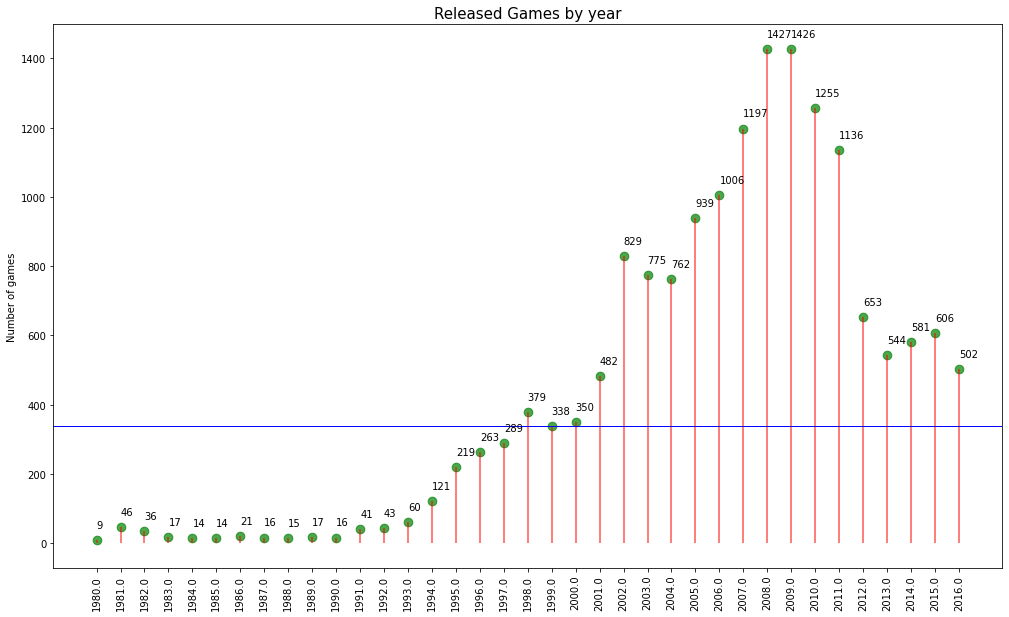

In [45]:
fig,ax=plt.subplots(figsize=(17,10))
ax.vlines(x=games_df_year.year_of_release, ymin=0, ymax=games_df_year.name, color='red', alpha=0.5, linewidth=2)
ax.scatter(x=games_df_year.year_of_release,y=games_df_year.name, s=75, color='green',alpha=0.7)

ax.set_title("Released Games by year", fontdict={'size':15})
ax.set_ylabel('Number of games')
ax.set_xticks(games_df_year.year_of_release)
ax.set_xticklabels(games_df_year.year_of_release,rotation=90)
ax.axhline(y=338,linewidth=1, color='blue')

for row in games_df_year.itertuples():
    ax.text(row.year_of_release, row.name+35,s=row.name)


***We can see that years 2000 and below are not signifcant (as it is below 338 this what i set the threshold - the median)
   1998 is an outlier and i excluded it as well***
   
***

#### How sales are varied from platform to platform ?

In [46]:
games_df_plat= games_df[['platform','total_sales']].groupby(['platform']).sum().sort_values(by='total_sales',
                                                                                            ascending=False).reset_index()
games_df_plat

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


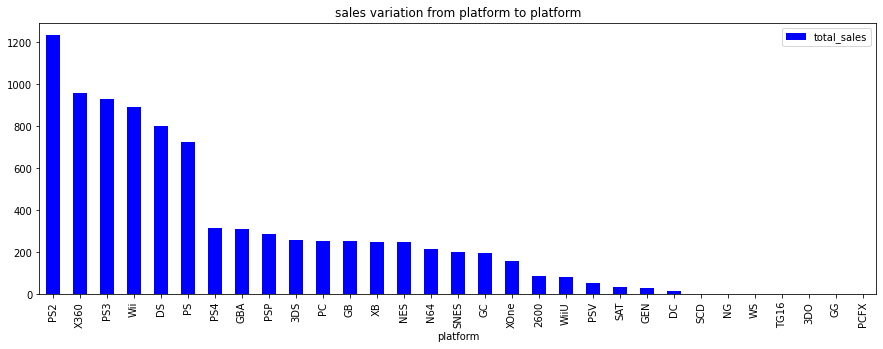

In [47]:
games_df_plat.plot(x='platform',y='total_sales',kind = 'bar', grid=False,color='blue' ,figsize=(15,5))
plt.title('sales variation from platform to platform');


PS2 is the has the higest total sales with 1255.77M 
PCFX has the lowest with 0.03M total sales 

#### Which platforms have have the greatest total sales ?

In [48]:
games_df_plat['total_sales_z']=(games_df_plat['total_sales']-games_df_plat['total_sales'].mean())/games_df_plat[
    'total_sales'].std()

In [49]:
games_df_plat

,platform,total_sales,total_sales_z
0,PS2,1233.56,2.759744
1,X360,961.24,1.968011
2,PS3,931.34,1.881081
3,Wii,891.18,1.764321
4,DS,802.78,1.507310
5,PS,727.58,1.288676
6,PS4,314.14,0.086655
7,GBA,312.88,0.082992
8,PSP,289.53,0.015105
9,3DS,257.81,-0.077116


In [50]:
games_df_plat['color'] = ['red' if x < 0  else 'green' for x in games_df_plat['total_sales_z']]
games_df_plat

,platform,total_sales,total_sales_z,color
0,PS2,1233.56,2.759744,green
1,X360,961.24,1.968011,green
2,PS3,931.34,1.881081,green
3,Wii,891.18,1.764321,green
4,DS,802.78,1.507310,green
5,PS,727.58,1.288676,green
6,PS4,314.14,0.086655,green
7,GBA,312.88,0.082992,green
8,PSP,289.53,0.015105,green
9,3DS,257.81,-0.077116,red


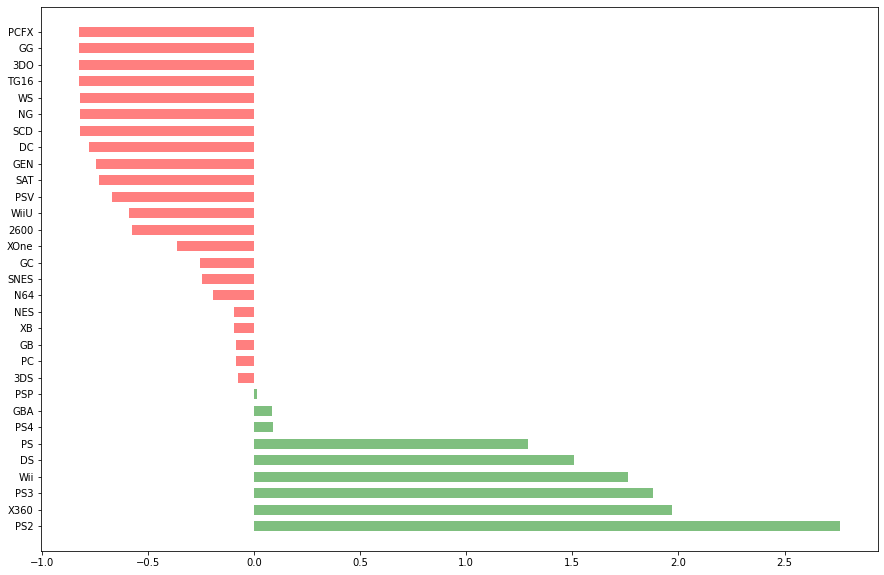

In [51]:
plt.figure(figsize=(15,10))
plt.hlines(y=games_df_plat.platform,xmax=games_df_plat.total_sales_z, xmin=0,color=games_df_plat.color, 
           alpha=0.5, linewidth=10);

After adding Z-score we can see that we have 9 companies that drive the mean for the reset
This are the top platformes that have greatest total sales

****

#### How long does new platforms take to appear and old once to fade away?

In [52]:
plat_age = games_df[games_df.year_of_release>=1997]
plat_age = plat_age.groupby('platform')['year_of_release'].agg(['max','min']).reset_index()
plat_age['age'] = plat_age['max'] - plat_age['min']
plat_age.sort_values(by = 'age',ascending=False)

,platform,max,min,age
7,PC,2016.0,1997.0,19.0
19,X360,2016.0,2005.0,11.0
9,PS2,2011.0,2000.0,11.0
12,PSP,2015.0,2004.0,11.0
17,Wii,2016.0,2006.0,10.0
10,PS3,2016.0,2006.0,10.0
1,DC,2008.0,1998.0,10.0
2,DS,2013.0,2004.0,9.0
20,XB,2008.0,2000.0,8.0
4,GBA,2007.0,2000.0,7.0


In [53]:
plat_age['age'].median()

6.0

In [54]:
plat_age.query('age > 7 ')

,platform,max,min,age
1,DC,2008.0,1998.0,10.0
2,DS,2013.0,2004.0,9.0
7,PC,2016.0,1997.0,19.0
9,PS2,2011.0,2000.0,11.0
10,PS3,2016.0,2006.0,10.0
12,PSP,2015.0,2004.0,11.0
17,Wii,2016.0,2006.0,10.0
19,X360,2016.0,2005.0,11.0
20,XB,2008.0,2000.0,8.0


*The median age of a platform is 7 year, each platform that is above it is considered older platform*

*For example we can look at platformes like SAT and SNES that already faded away*

****

#### Which platforms used to be popular and now have zero sales?

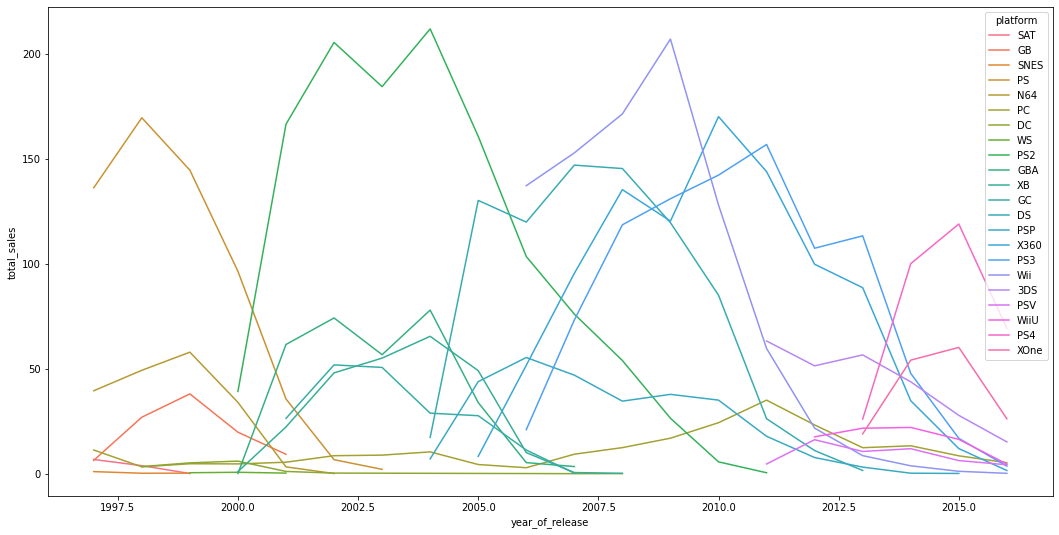

In [55]:
games_df_pop = games_df[games_df.year_of_release>=1997]
games_df_pop = games_df_pop.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index().sort_values(
by='year_of_release')
plt.figure(figsize=(18,9))
ax = sns.lineplot(data=games_df_pop, x="year_of_release", y="total_sales",hue="platform");

*We can see that for example platforms as XB and GC is already zero in sales but used to be popular  *

***

#### what period needs to be taken into considoration to bulid pragnosis for the advertising campaigns for 2017? 

In [56]:
games_df_new =games_df[games_df.year_of_release >= 2014]
games_df_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


*Based on all of the above analsis i am taking data from 2010 and above*
***

#### which platforms lead in sales?

In [57]:
games_df_new_lead = games_df_new.groupby('platform')['total_sales'].sum().reset_index()
games_df_new_lead.sort_values(by='total_sales',ascending=False).style.background_gradient('coolwarm',subset=['total_sales'])

,platform,total_sales
3,PS4,288.150000
9,XOne,140.360000
0,3DS,86.680000
2,PS3,68.180000
8,X360,48.220000
7,WiiU,42.980000
1,PC,27.050000
5,PSV,22.400000
6,Wii,5.070000
4,PSP,0.360000


*If we look at only total sales by platform we see the lead of sales to be PS4 and XOne*
***

#### which platforms growing or shrinking?

In [58]:
games_df_new_sales = games_df_new.pivot_table(index='year_of_release',columns = 'platform',values = 'total_sales', aggfunc = 'sum'
).fillna(0)
games_df_new_sales

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014.0,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


In [59]:
games_df_new_sales.shift(+1)

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015.0,43.76,13.28,47.76,100.0,0.24,11.90,3.75,22.03,34.74,54.07
2016.0,27.78,8.52,16.82,118.9,0.12,6.25,1.14,16.35,11.96,60.14


In [60]:
games_df_new_sales - games_df_new_sales.shift(+1)

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015.0,-15.98,-4.76,-30.94,18.90,-0.12,-5.65,-2.61,-5.68,-22.78,6.07
2016.0,-12.64,-3.27,-13.22,-49.65,-0.12,-2.00,-0.96,-11.75,-10.44,-33.99


In [61]:
matrix = (games_df_new_sales - games_df_new_sales.shift(+1)).T
matrix

year_of_release,2014.0,2015.0,2016.0
platform,,,
3DS,NaN,-15.98,-12.64
PC,NaN,-4.76,-3.27
PS3,NaN,-30.94,-13.22
PS4,NaN,18.90,-49.65
PSP,NaN,-0.12,-0.12
PSV,NaN,-5.65,-2.00
Wii,NaN,-2.61,-0.96
WiiU,NaN,-5.68,-11.75
X360,NaN,-22.78,-10.44


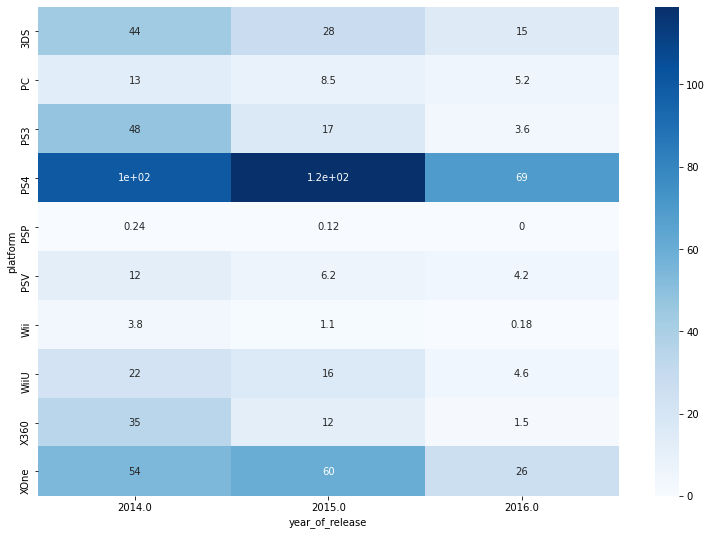

In [62]:
plt.figure(figsize=(13,9))
sns.heatmap(games_df_new_sales.T, cmap='Blues', annot=True);

 We see that Newer platforms such  as PS4 and XOne are the most is growing fast 
 And PS3 is shrinking so does the X360 the previous genrations.   
 **** 

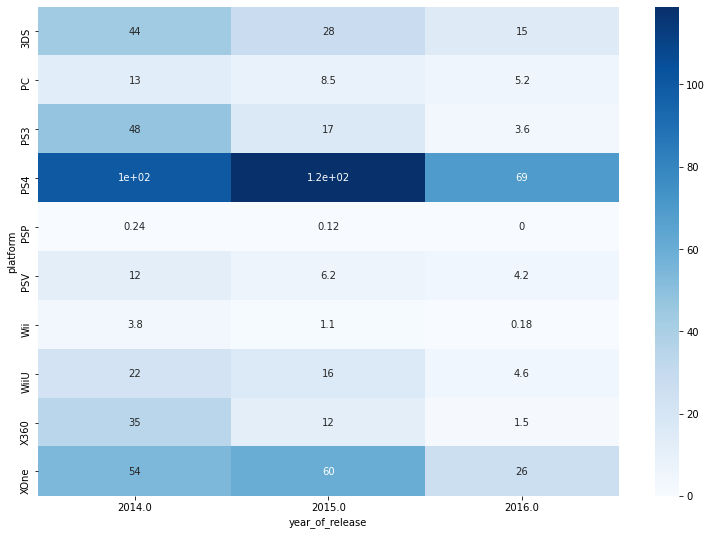

In [63]:
# reviewer's code

plt.figure(figsize=(13,9))
sns.heatmap(games_df_new_sales.T, cmap='Blues', annot=True);

#### Global sales of each game, broken down by platform
#### Are the differences in sales significant ? 

In [64]:
games_df_new_grouped = games_df_new.groupby(['name','platform'])['total_sales'].sum().reset_index()
games_df_new_grouped

,name,platform,total_sales
0,Beyblade Burst,3DS,0.03
1,Fire Emblem Fates,3DS,1.67
2,Haikyu!! Cross Team Match!,3DS,0.04
3,12-Sai. Honto no Kimochi,3DS,0.07
4,12-Sai. Koisuru Diary,3DS,0.05
...,...,...,...
1684,ZombiU,XOne,0.01
1685,Zombie Army Trilogy,PS4,0.20
1686,Zombie Army Trilogy,XOne,0.11
1687,htoL#NiQ: The Firefly Diary,PSV,0.01


In [65]:
ordered_grouped = games_df_new_grouped.groupby(['platform'])['total_sales'].sum().reset_index().sort_values(
by='total_sales')['platform']
ordered_grouped

4     PSP
6     Wii
5     PSV
1      PC
7    WiiU
8    X360
2     PS3
0     3DS
9    XOne
3     PS4
Name: platform, dtype: object

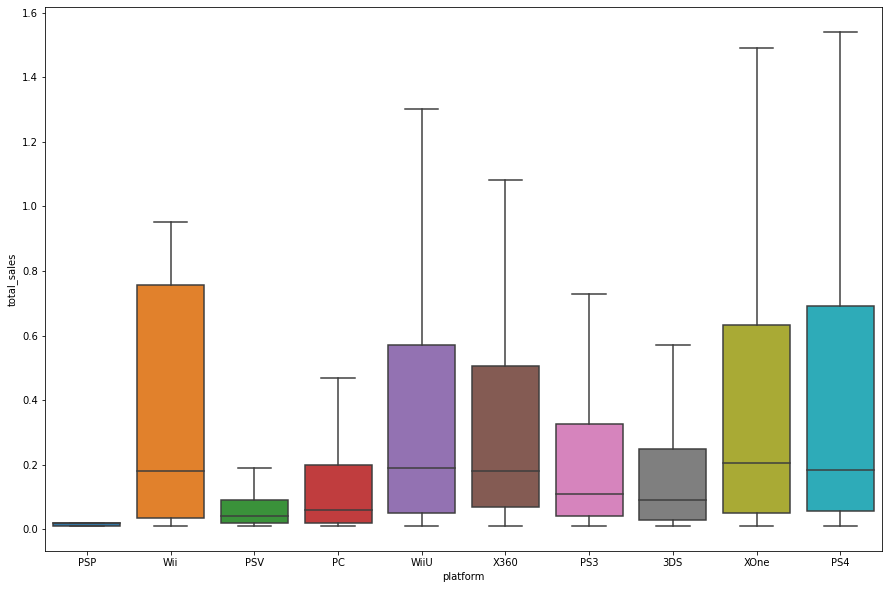

In [66]:
plt.figure(figsize=(15,10))
sns.boxplot(x='platform',y='total_sales',data=games_df_new_grouped,order=ordered_grouped,showfliers = False);

*looking at the graph we see that the most profitable is PS4 and XOne and 3DS are below it,
 but the median (total_sale) XOne game is higer, this can be explained by the fact that PS4 hase more games sold. 
 
 ***

#### How user and professional reviews affect sales for a particular popular platform?
##### Building a scatter plot and calculating the correlation between reviews and sales

In [67]:
games_df_new_PS4 = games_df_new.query('platform == "PS4"')
games_df_new_PS4.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.219443,-0.195176,-0.040969,-0.219129,-0.044226,0.035502,-0.214338
na_sales,-0.219443,1.000000,0.784902,0.491452,0.944903,0.411638,-0.016156,0.928090
eu_sales,-0.195176,0.784902,1.000000,0.472101,0.944380,0.340268,-0.064199,0.958109
jp_sales,-0.040969,0.491452,0.472101,1.000000,0.510433,0.379041,0.179384,0.538524
other_sales,-0.219129,0.944903,0.944380,0.510433,1.000000,0.404645,-0.044166,0.998252
critic_score,-0.044226,0.411638,0.340268,0.379041,0.404645,1.000000,0.546434,0.402661
user_score,0.035502,-0.016156,-0.064199,0.179384,-0.044166,0.546434,1.000000,-0.040132
total_sales,-0.214338,0.928090,0.958109,0.538524,0.998252,0.402661,-0.040132,1.000000


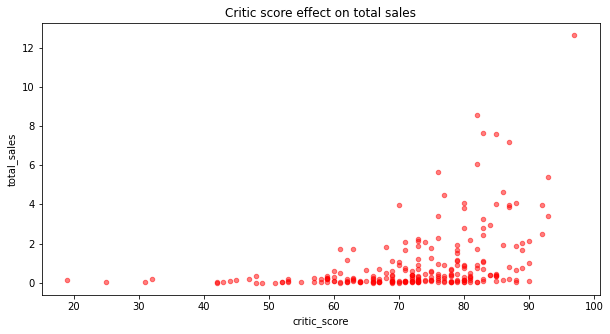

In [68]:
games_df_new_PS4.plot.scatter(x= 'critic_score', y = 'total_sales', c ="red",alpha=0.5,figsize=(10,5),
title="Critic score effect on total sales");

*we can see positive corralation between Critic_score and total sales with moderate coefficient of ~0.39

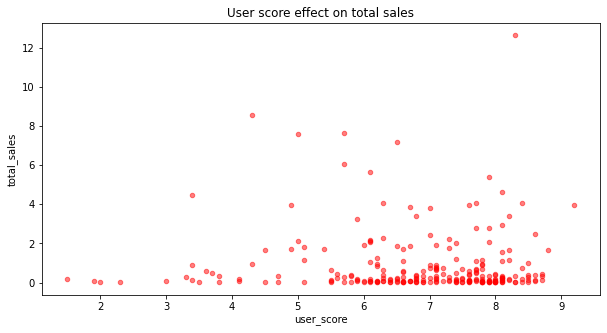

In [69]:
games_df_new_PS4.plot.scatter(x= 'user_score', y = 'total_sales', c ="red",alpha=0.5,figsize=(10,5),
title="User score effect on total sales");

*we can see week corralation coefficient below ~0.02*

*We can assume that user score dont affect sales that much* 

***

##### Based on the above conclusions compression of same games on other platforms

In [70]:
games_df_new_PS4.name.duplicated().sum()

0

In [71]:
games_df_new_PS4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,M,0.01
16503,Shin Hayarigami 2,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16526,Dungeons 2,PS4,2016.0,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016.0,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


In [72]:
mask = games_df_new.name.isin(games_df_new_PS4.name)

In [73]:
games_df_new_all = games_df_new[mask]
games_df_new_all

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016.0,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


In [74]:
games_df_new_all.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.203878,-0.159124,-0.018486,-0.166210,-0.012744,0.023608,-0.188450
na_sales,-0.203878,1.000000,0.718360,0.195368,0.853799,0.331131,-0.072417,0.905989
eu_sales,-0.159124,0.718360,1.000000,0.281196,0.930076,0.266555,-0.051776,0.940646
jp_sales,-0.018486,0.195368,0.281196,1.000000,0.328160,0.204033,0.179120,0.324407
other_sales,-0.166210,0.853799,0.930076,0.328160,1.000000,0.293006,-0.041101,0.976696
critic_score,-0.012744,0.331131,0.266555,0.204033,0.293006,1.000000,0.471921,0.322145
user_score,0.023608,-0.072417,-0.051776,0.179120,-0.041101,0.471921,1.000000,-0.053450
total_sales,-0.188450,0.905989,0.940646,0.324407,0.976696,0.322145,-0.053450,1.000000


In [75]:
def other_plat(name_plat):
    platform = games_df_new_all[games_df_new_all['platform'] == name_plat]
    fig,ax = plt.subplots(1,2,figsize=(15,10))
    sns.scatterplot(x='user_score',y='total_sales',data = platform,ax=ax[0],facecolor='red')
    sns.scatterplot(x='critic_score',y='total_sales',data = platform,ax=ax[1],facecolor='red')
    fig.suptitle(name_plat,fontsize=20)
    ax[0].set(xlabel='user_score')
    ax[1].set(xlabel='critic_score')
    ax[0].set(ylabel='total_sales')
    ax[1].set(ylabel='total_sales')
    plt.show()
    
    user_corr = platform['user_score'].corr(platform['total_sales'])
    critic_corr = platform['critic_score'].corr(platform['total_sales'])
    
    if 0.3 >= critic_corr >= 0:
        print('Correlation between critic reviews and gaming platform', name_plat.upper(), ': Weak', critic_corr)
    elif 0.7 >= critic_corr >= 0.3:
        print('Correlation between critic reviews and gaming platform ', name_plat.upper(), ': Moderate', critic_corr)
    elif critic_corr >= 0.7:
        print('Correlation between critic reviews and gaming platform ', name_plat.upper(), ': Strong', critic_corr)
    
    if 0.3 >= user_corr >= 0:
        print('Correlation between user reviews and gaming platform', name_plat.upper(), ': Weak', user_corr)
    elif 0.7 >= user_corr >= 0.3:
        print('Correlation between user reviews and gaming platform ', name_plat.upper(), ': Moderate', user_corr)
    elif user_corr >= 0.7:
        print('Correlation between user reviews and gaming platform ', name_plat.upper(), ': Strong', user_corr)

   
    print('\n')

In [76]:
plat_arry= games_df_new_all['platform'].unique()
plat_arry

array(['PS4', 'XOne', 'PS3', 'X360', 'Wii', 'PSV', 'PC', 'WiiU', '3DS',
       'PSP'], dtype=object)

In [77]:
plat_list = ['X360', 'PS3', 'Wii', 'XOne', 'PC', 'PSV','3DS', 'WiiU']

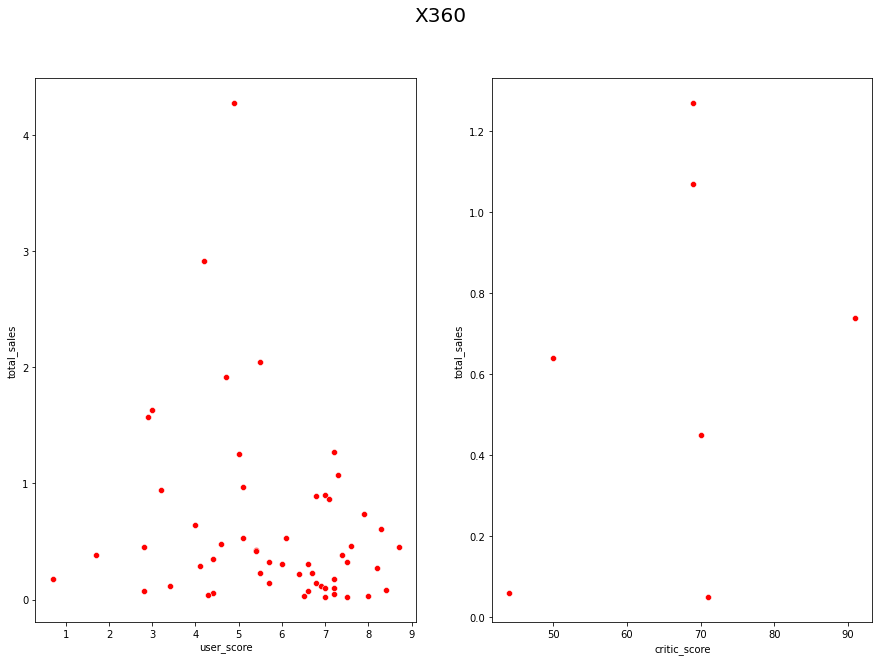

Correlation between critic reviews and gaming platform  X360 : Moderate 0.34287108173521025




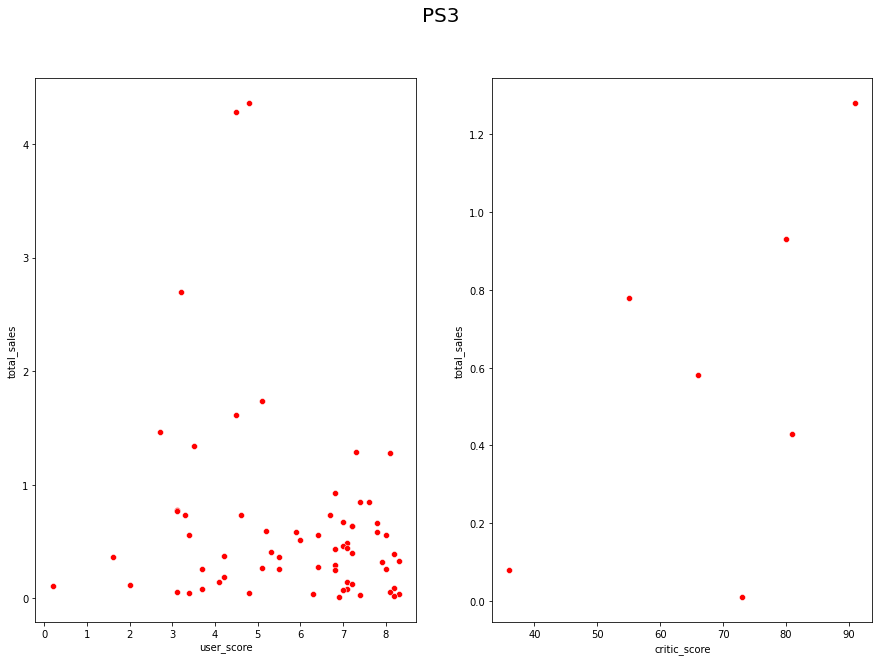

Correlation between critic reviews and gaming platform  PS3 : Moderate 0.5692235334930033




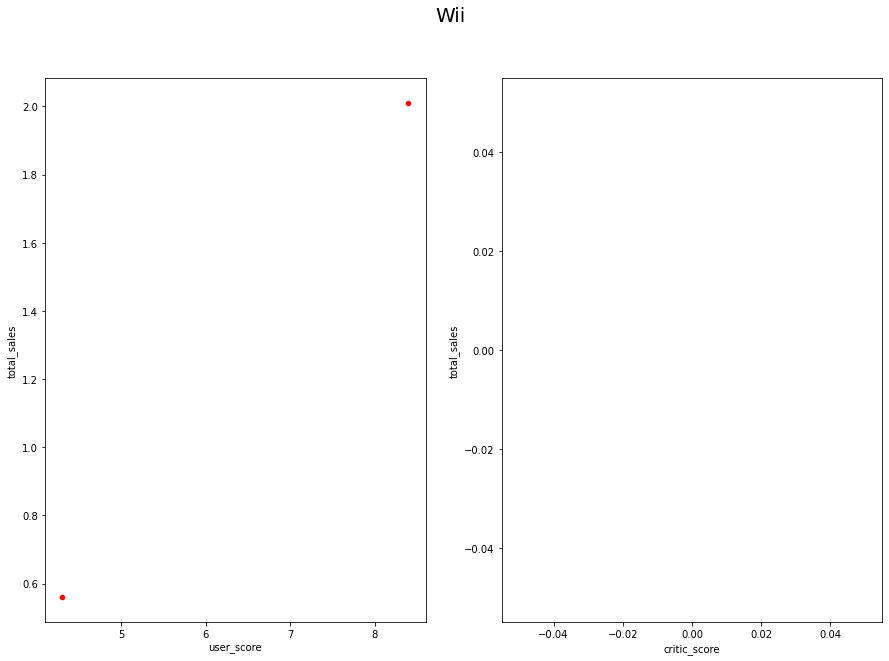

Correlation between user reviews and gaming platform  WII : Strong 1.0




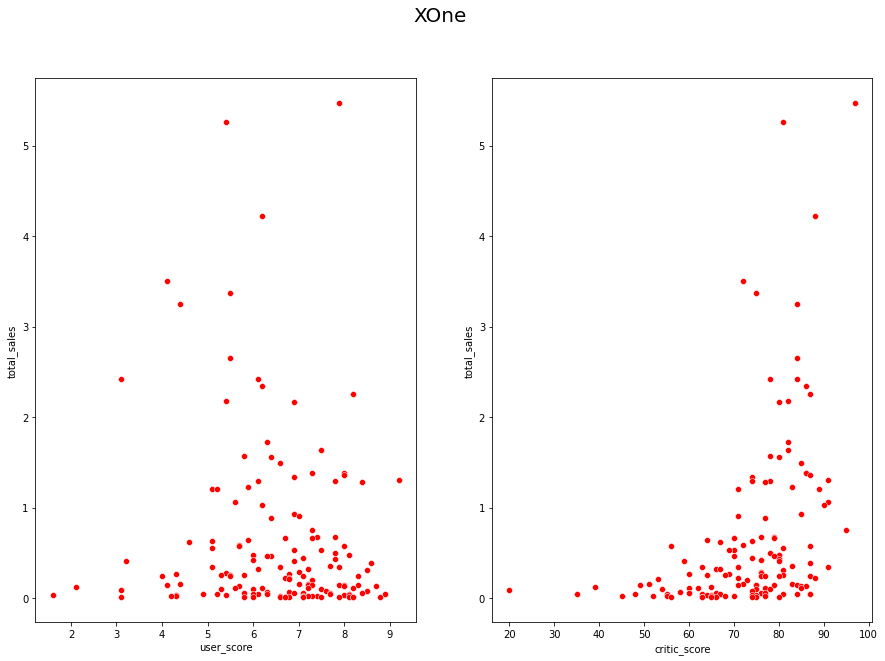

Correlation between critic reviews and gaming platform  XONE : Moderate 0.39928209642290174




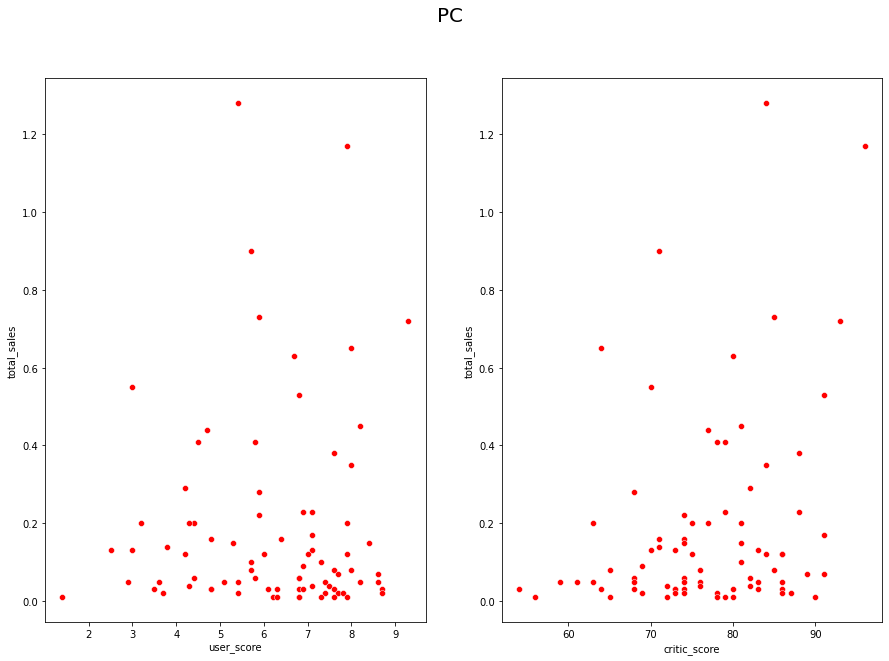

Correlation between critic reviews and gaming platform PC : Weak 0.278486937841718
Correlation between user reviews and gaming platform PC : Weak 0.03649778524301582




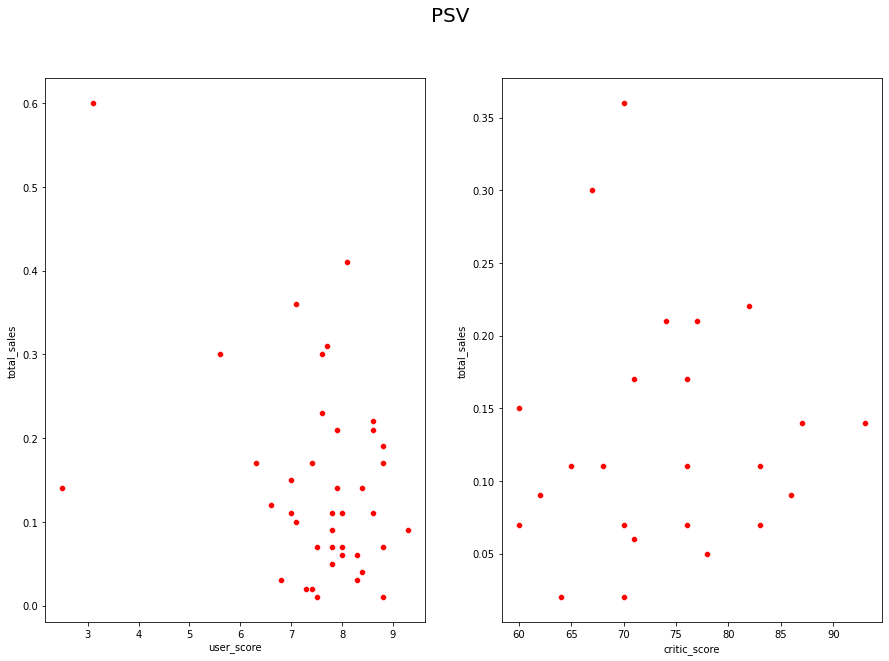

Correlation between critic reviews and gaming platform PSV : Weak 0.045752964502282896




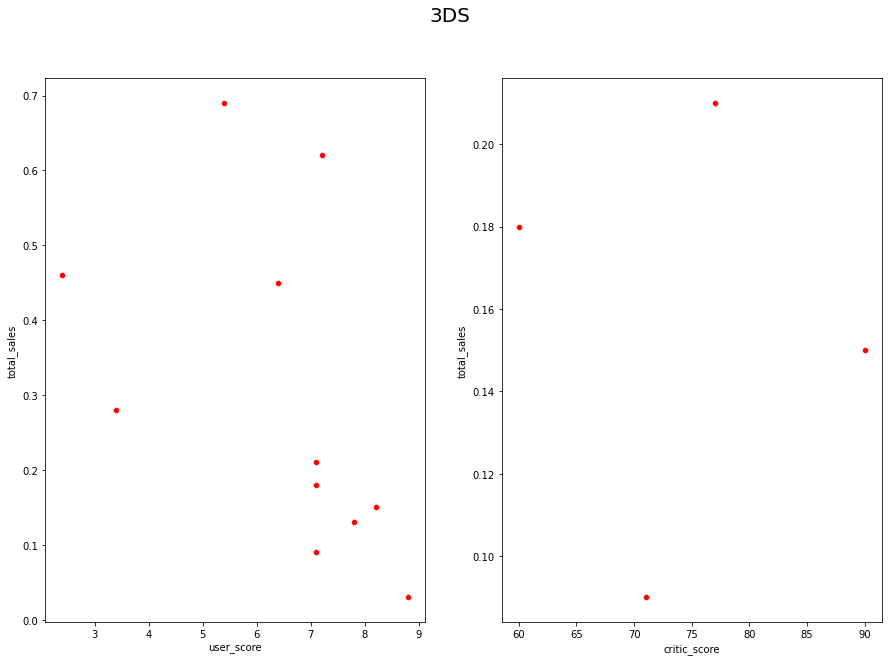

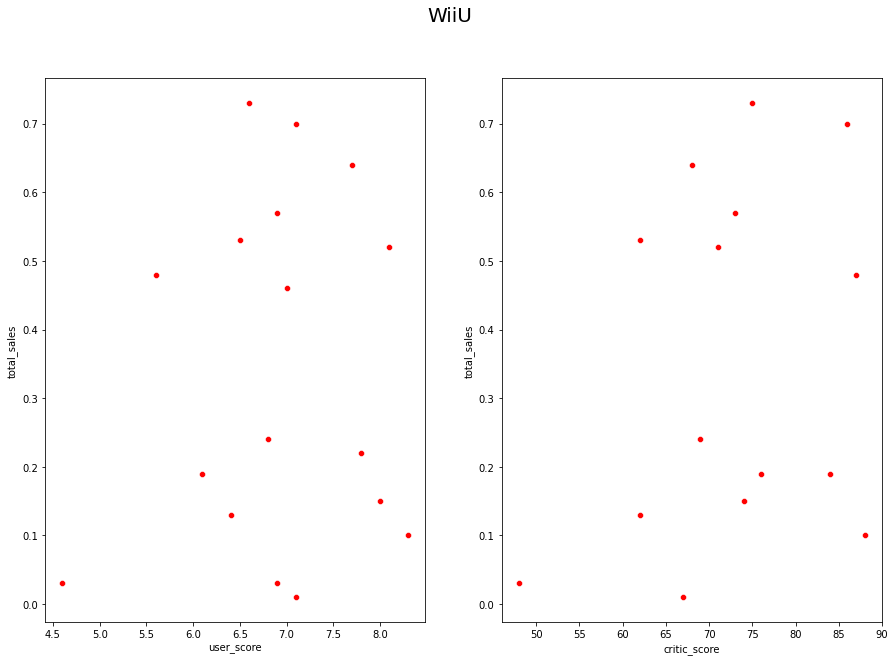

Correlation between critic reviews and gaming platform WIIU : Weak 0.25791405641654896
Correlation between user reviews and gaming platform WIIU : Weak 0.10376814542618025




In [78]:
for platform in plat_list:
    other_plat(platform)    

<u>*Summery:*</u>


- X360 - Correlation between critic reviews and gaming platform  X360 : Moderate ~0.34
- PS3 - Correlation between critic reviews and gaming platform  PS3 : Moderate ~0.57
- Wii - Correlation between user reviews and gaming platform  WII : Strong 1.0 
- Xone - Correlation between critic reviews and gaming platform  XONE : Moderate ~0.4
- PC -  Correlation between critic reviews and gaming platform PC : Weak ~0.27
        Correlation between user reviews and gaming platform PC : Weak ~0.036 
- PSV - Correlation between critic reviews and gaming platform PSV : Weak ~0.045
- WiiU - Correlation between critic reviews and gaming platform WIIU : Weak 0.257
         Correlation between user reviews and gaming platform WIIU : Weak 0.10
         
         
Overall, we see critic view has more affect on sales then user score. 
Not all games has critic and user score because not a lot of data.

#### Distribuation of the  most profitable games  by geners 

In [79]:
games_df_new_genres = games_df_new.groupby('genre')['total_sales'].median().reset_index().sort_values(by='total_sales',
                                                                                                   ascending=False)
games_df_new_genres

,genre,total_sales
8,Shooter,0.515
10,Sports,0.180
4,Platform,0.140
2,Fighting,0.125
7,Role-Playing,0.110
9,Simulation,0.100
0,Action,0.090
3,Misc,0.090
6,Racing,0.090
11,Strategy,0.060


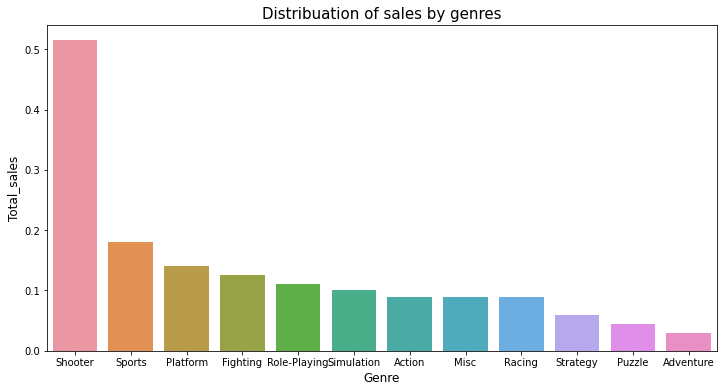

In [80]:
plt.figure(figsize=(12,6))
plt.title('Distribuation of sales by genres',fontsize=15)
sns.barplot(data=games_df_new_genres, x='genre', y='total_sales')
plt.xlabel('Genre',fontsize=12)
plt.ylabel('Total_sales',fontsize=12);

*Top 3 genres are Shooter, Sports and platform*

*Lowest 3 genres are Adventure,Strategy and puzzle* 

***

## Creating a user profile for each region

### Top 5 for each region ( Platforms,Genres,Ratings)

In [81]:
na_plat = games_df_new.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False)
eu_plat = games_df_new.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False) 
jp_plat = games_df_new.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False)

In [82]:
data_frames = [na_plat, eu_plat, jp_plat]
games_df_new_top_plat = reduce(lambda  left,right: pd.merge(left,right,on=['platform'],
                                            how='outer'), data_frames)
games_df_new_top_plat

,platform,na_sales,eu_sales,jp_sales
0,PS4,98.61,130.04,15.02
1,XOne,81.27,46.25,0.32
2,X360,28.30,15.49,0.08
3,3DS,22.64,16.12,44.24
4,PS3,22.05,25.54,11.22
5,WiiU,19.36,13.15,7.31
6,PC,7.23,17.97,0.00
7,PSV,2.52,3.53,14.54
8,Wii,2.08,2.59,0.00
9,PSP,0.00,0.00,0.36


In [83]:
def pivot(row, title):
    fig, axes = plt.subplots(1, 3, figsize=(20, 8))
    for pivot, ax in zip(list(['platform','genre','rating']),axes.flatten()[:3]):
        ppivot = games_df_new.pivot_table(index=pivot, values=row, aggfunc='sum'
                  ).sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        display(ppivot)
        print('\n\n') 
        sns.set_palette("Blues")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)
        

plt.show()
sns.set()

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05


,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05


,rating,na_sales
0,M,102.36
1,unknown,56.40
2,E,50.76
3,T,39.98
4,E10+,34.56


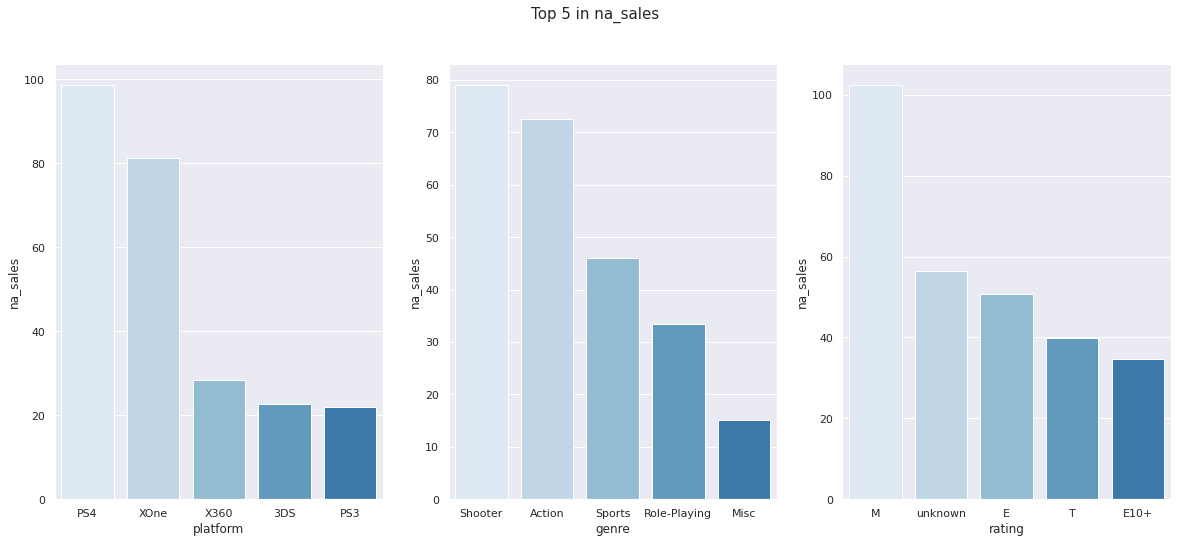

In [84]:
pivot('na_sales','Top 5 in na_sales')

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12


,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13


,rating,eu_sales
0,M,99.52
1,E,58.27
2,unknown,50.66
3,T,34.87
4,E10+,27.36


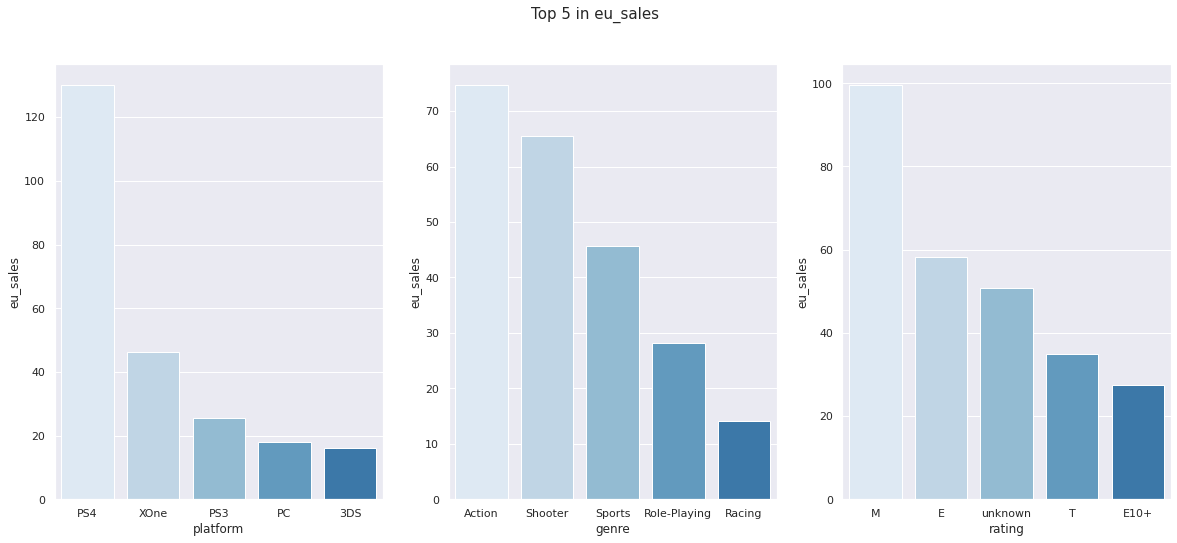

In [85]:
pivot('eu_sales','Top 5 in eu_sales')

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31


,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87


,rating,jp_sales
0,unknown,55.18
1,T,15.84
2,E,8.98
3,M,8.35
4,E10+,4.74


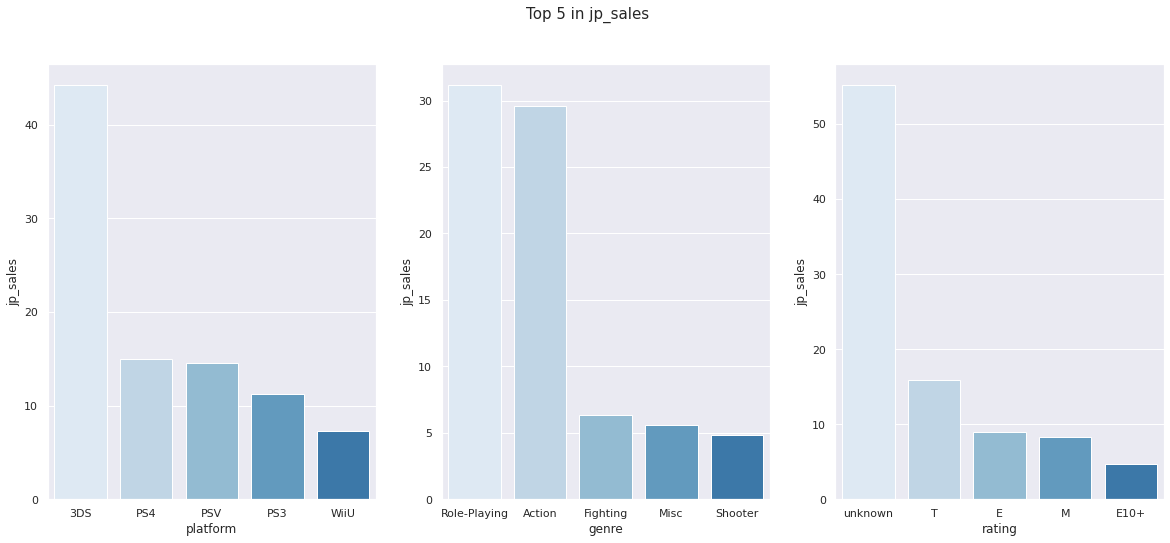

In [86]:
pivot('jp_sales','Top 5 in jp_sales')

<u>*Top 5 by regions:*</u>

1. Platforms:
   - NA - the PS4 is the most profitable with ~98M in sales 
   - EU - the PS4 is the most profitable with ~130M in sales
   - JP - the 3DS is the most profitable with ~44M in sales 
  

2. Genres:
   - NA - Shooter genre is the most profitable with ~79M in sales
   - EU - Action genre is the most profitable with ~74M  sales   
   - JP - Role-Playing genre is the most profitable with ~31M in sales
2. Rating:
   - NA - M rating is the most profitable with ~102M in sales
   - EU - M rating is the most profitable with ~99M  in sales
   - JP - we see that the most profitable is the unknown with ~55m as we can make canclustion about it the next rating is T 
     With ~16M in sales

## Testing the following hypotheses: 

### Average user ratings of the Xbox One and PC platforms are the same. 

H0: Average user rating of Xbox One and PC are the same

H1: We don't have enough evidence to say that Average user rating of Xbox One and PC are same

In [87]:
games_df_new_XOne = games_df_new[(games_df_new.platform=='XOne')&(games_df_new.user_score.notna())]['user_score'].astype(float)
games_df_new_XOne.isnull().sum()
games_df_new_PC = games_df_new[(games_df_new.platform=='PC')&(games_df_new.user_score.notna())]['user_score'].astype(float)
games_df_new_PC.isnull().sum()

0

0

In [88]:
games_df_new_XOne.describe()
games_df_new_XOne.var()

games_df_new_PC.describe()
games_df_new_PC.var()

count    165.000000
mean       6.594545
std        1.375139
min        1.600000
25%        5.800000
50%        6.800000
75%        7.600000
max        9.200000
Name: user_score, dtype: float64

1.8910066518847013

count    122.000000
mean       6.298361
std        1.703278
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

2.901154315133451

In [89]:
stats.ttest_ind(games_df_new_XOne, games_df_new_PC,equal_var=False)

Ttest_indResult(statistic=1.5777606474474968, pvalue=0.11601398086668827)

In [107]:
p_value_1 = stats.ttest_ind(games_df_new_XOne, games_df_new_PC).pvalue
p_value_1

0.10450507919348415

In [108]:
p_value_1=p_value_1
alpha=0.05
if p_value_1<alpha:
    print('Reject H0: We dont have enough evidence to say that Average user rating of Xbox One and PC are the same')
else:
    print( 'Fail to Reject H0: Average user rating of Xbox One and PC are the same')

Fail to Reject H0: Average user rating of Xbox One and PC are the same


### Average user ratings for the Action and Sports genres are different.

H0: Average user rating of Action and Sports are the same

H1: Average user rating of Action and Sports are diffrent

In [95]:
games_df_new.genre.unique()

array(['Shooter', 'Action', 'Role-Playing', 'Sports', 'Fighting',
       'Racing', 'Misc', 'Platform', 'Simulation', 'Adventure', 'Puzzle',
       'Strategy'], dtype=object)

In [96]:
games_df_new_Action = games_df_new[(games_df_new.genre=='Action')&(games_df_new.user_score.notna())]['user_score'].astype(float)
games_df_new_Action.isnull().sum()
games_df_new_Sports = games_df_new[(games_df_new.genre=='Sports')&(games_df_new.user_score.notna())]['user_score'].astype(float)
games_df_new_Sports.isnull().sum()

0

0

In [97]:
games_df_new_Action.describe()
games_df_new_Action.var()

games_df_new_Sports.describe()
games_df_new_Sports.var()

count    297.000000
mean       6.760606
std        1.377852
min        2.000000
25%        6.100000
50%        7.100000
75%        7.700000
max        9.000000
Name: user_score, dtype: float64

1.8984766584766581

count    127.000000
mean       5.225197
std        1.856604
min        0.200000
25%        4.000000
50%        5.500000
75%        6.650000
max        8.800000
Name: user_score, dtype: float64

3.446979127609048

In [98]:
stats.ttest_ind(games_df_new_Action, games_df_new_Sports,equal_var=False)

Ttest_indResult(statistic=8.384614718486121, pvalue=1.1825550382644557e-14)

In [109]:
p_value_2 = stats.ttest_ind(games_df_new_Action, games_df_new_Sports).pvalue
p_value_2

2.8711147985105864e-19

In [111]:
p_value_2=p_value_2
alpha=0.05
if p_value_2<alpha:
    print('Reject H0: We dont have enough evidence to say that Average user rating of Action and Sports are the same')
else:
    print( 'Fail to Reject H0: Average user rating of Action and Sports are the same')

Reject H0: We dont have enough evidence to say that Average user rating of Action and Sports are the same


## General conclusion

**In this preliminary analysis we can conclude that:**

* In regrads to most profitable platform Top 2 profitable platforms PS4 and XOne
  
* For EU and NA the most profitable genres are Action and Shooters 

* For EU and NA most profitable ratin is M 

* User score has no significant effect on slaes 

* Critic score has moderate strength on PS4 and XOne while user score has week strength 

* we should take in to account the region in which we will sell and adjust advertising campaigns accordingly

<u>What was done in order to get to a Conclusion</u>

Missing values:     

* Columns Genre, name and year of release hase been removed (very low % out the data ) 
* User score and critic score was filled with median by name. there were still missing values that were left that was left 
  untouched.
* Rating was replaced with most common values with mode method by name of game. The nan-s that was ledt is replaced with 
  'unknown' to help in the rating analsis forward down the line

Statistical hypotheses test:

* I used T-test for the means of two independent samples of scores, this test is in order to test the means of 2 sample
  and if the means differ or not. The significance level was alpha = 0.05 in the tests 
